<a href="https://colab.research.google.com/github/diegopovalz/proyecto-modelos1/blob/main/03%20-%20Modelos%20e%20iteraciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instalamos Kaggle

In [ ]:
!pip install -q kaggle

## Obtener el kaggle.json

A partir de aquí tenemos dos opciones

### Opción 1

Descargamos nuestro token de Kaggle desde https://www.kaggle.com/settings/account, en el botón `Create New Token`

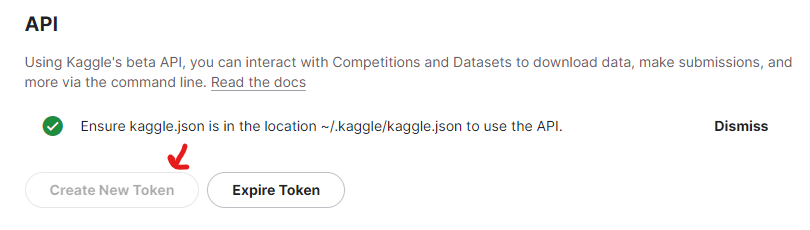

Y lo cargamos

In [ ]:
from google.colab import files
files.upload()

### Opción 2

Descargamos el `kaggle.json` de uno de los integrantes del equipo (Diego Poveda) y lo usamos

In [ ]:
!gdown 1WGDJbebCShFyozKKRJW3p78wJhwrZA12

Downloading...
From: https://drive.google.com/uc?id=1WGDJbebCShFyozKKRJW3p78wJhwrZA12
To: /content/kaggle.json
100% 67.0/67.0 [00:00<00:00, 255kB/s]


### Configuración del archivo para API de Kaggle

Configuramos el archivo de API de Kaggle

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Descargamos el ZIP con los datasets del Kaggle

In [ ]:
!kaggle competitions download -c playground-series-s3e4

100% 84.0M/84.1M [00:00<00:00, 143MB/s] 
100% 84.1M/84.1M [00:00<00:00, 124MB/s]


Y los extraemos para poder usar `train.csv`

In [ ]:
!unzip playground-series-s3e4.zip

Archive:  playground-series-s3e4.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


Importamos las librerías necesarias

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

Consegumos el dataset

In [ ]:
df = pd.read_csv('train.csv')

# Simulación de datos

Empezamos simulando un rango de monto pagado (bajo, medio, alto)

In [ ]:
bins = [0, 50, 200, float('inf')]
labels = ['Bajo', 'Medio', 'Alto']
df['AmountRange'] = pd.cut(df['Amount'], bins=bins, labels=labels)
df

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,AmountRange
0,0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,...,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0,Bajo
1,1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,...,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0,Medio
2,2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,...,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0,Bajo
3,3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,...,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0,Bajo
4,4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,...,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0,Bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219124,219124,120580.0,1.891079,-1.272908,-3.783908,-1.388939,2.012789,2.666080,0.151740,0.401934,...,-0.456538,-0.069571,0.756765,0.244479,-0.147566,-0.054725,-0.044588,198.65,0,Medio
219125,219125,120580.0,0.139724,0.948649,-2.913655,-2.184829,1.883716,-1.056824,1.725624,0.018089,...,1.478823,-0.085398,-0.091409,-1.053488,0.467570,0.358918,0.294735,24.00,0,Bajo
219126,219126,120580.0,2.058343,-0.038993,-1.928553,0.330117,0.270127,-0.735664,-0.173878,0.144823,...,-0.965783,0.307799,-0.021434,-0.343989,0.181065,-0.098387,-0.044064,1.79,0,Bajo
219127,219127,120580.0,2.079227,-2.162389,-1.785833,-2.804889,0.552845,4.038013,-2.155900,1.023785,...,0.590401,0.286621,0.675660,-0.510736,-0.090044,0.056749,-0.017126,88.00,0,Medio


También simulamos el medio donde se hizo la transacción

In [ ]:
medios = ['En línea', 'Supermercado', 'Restaurante']
np.random.seed(0)
df['Medio'] = np.random.choice(medios, size=len(df))

También simulamos el tipo de tarjeta usada para la transacción

In [ ]:
tipos_tarjeta = ['Débito', 'Crédito', 'Prepagada']
np.random.seed()
df['TipoTarjeta'] = np.random.choice(tipos_tarjeta, size=len(df))

# Simulación de datos faltantes

Ahora simularemos el 5% de datos faltantes en las columnas categóricas 'Medio', 'TipoTarjeta' y 'AmountRange', ya que son columnas donde se espera que puedan faltar datos en un escenario real.

In [ ]:
np.random.seed()
columns_with_nans = ['Medio', 'TipoTarjeta', 'AmountRange']

porcentaje_nans = np.random.uniform(5, 15)
num_nan_rows = int((porcentaje_nans / 100) * len(df))

for column in columns_with_nans:
    nan_indices = np.random.choice(df.index, size=num_nan_rows, replace=False)
    df.loc[nan_indices, column] = np.nan

# Transformaciones

Tranformamos las variables categóricas haciendo uso de la codificación One-Hot

In [ ]:
df = pd.get_dummies(df, columns=['AmountRange', 'TipoTarjeta', 'Medio'])

Dividimos el dataset en conjuntos de entrenamiento y prueba

In [ ]:
X = df.drop('Class', axis=1)  # Todas las columnas excepto la objetivo
y = df['Class']               # La columna objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Modelo de Regresión Logística

Entrenaremos un modelo de regresión logística

In [ ]:
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [ ]:
y_pred = model.predict(X_test)

# Métricas

Empezamos calculando el Accuracy

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
accuracy

0.9975128918906585

Continuamos calculando el Precision

In [ ]:
precision = precision_score(y_test, y_pred)
precision

0.15384615384615385

Ahora calculamos el Recall

In [ ]:
recall = recall_score(y_test, y_pred)
recall

0.04395604395604396

Ahora calculamos el F1-Score

In [ ]:
f1 = f1_score(y_test, y_pred)
f1

0.06837606837606838

## ROC-AUC

Calculamos el ROC-AUC

In [ ]:
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

auc = roc_auc_score(y_test, y_probs)
auc

0.7287775903072576

Graficamos la curva ROC

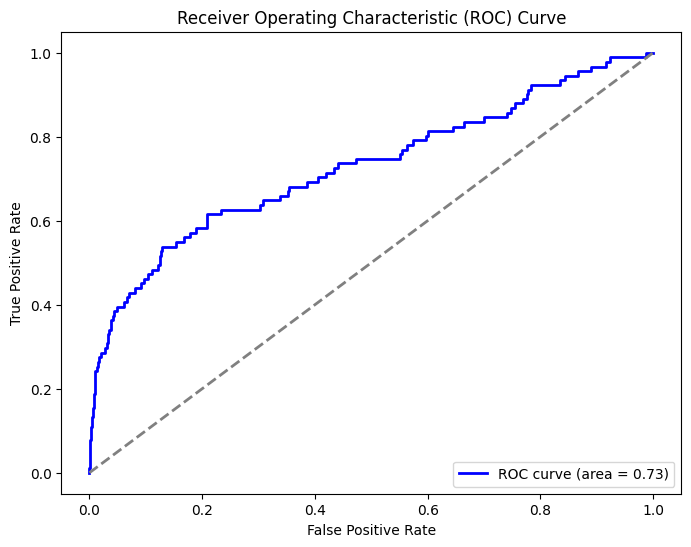

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Hiperparametros

Debido a que nuestro dataset es demasiado grande, vamos a usar un dataset reducido para los siguientes cálculos, ya que usando el dataset original pueden tardar mucho tiempo


In [ ]:
df_sampled = df.sample(frac=0.1, random_state=0)

# Ahora, dividimos este dataset más pequeño en conjuntos de entrenamiento y prueba
X_sampled = df_sampled.drop('Class', axis=1)
y_sampled = df_sampled['Class']
X_train_sampled, X_test_sampled, y_train_sampled, y_test_sampled = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=0)

## Algoritmos predictivos

### Regresión Logística

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros a probar
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

# Crear el modelo de regresión logística
log_reg = LogisticRegression(max_iter=5000)

# Crear el objeto de búsqueda en cuadrícula
grid_search_lr = GridSearchCV(log_reg, param_grid_lr, cv=5, scoring='accuracy')

# Ejecutar la búsqueda en cuadrícula con el dataset reducido
grid_search_lr.fit(X_train_sampled, y_train_sampled)

# Mejores hiperparámetros para la regresión logística
best_params_lr = grid_search_lr.best_params_
best_params_lr

{'C': 0.001, 'solver': 'liblinear'}

### Árboles de Decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Definir los hiperparámetros a probar
param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10]
}

# Crear el modelo de árbol de decisión
decision_tree = DecisionTreeClassifier()

# Crear el objeto de búsqueda en cuadrícula
grid_search_dt = GridSearchCV(decision_tree, param_grid_dt, cv=5, scoring='accuracy')

# Ejecutar la búsqueda en cuadrícula con el dataset reducido
grid_search_dt.fit(X_train_sampled, y_train_sampled)

# Mejores hiperparámetros para árboles de decisión
best_params_dt = grid_search_dt.best_params_
best_params_dt

{'max_depth': 10, 'min_samples_split': 5}

## Combinaciones de Algoritmos No Supervisados + Predictivos

### PCA + Regresión Logística

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

max_features = X_train_sampled.shape[1]

# Crear un pipeline con PCA y regresión logística
pipeline_pca_lr = Pipeline([
    ('pca', PCA()),
    ('logistic', LogisticRegression(solver='liblinear'))
])

# Definir los hiperparámetros a probar
param_grid_pca_lr = {
    'pca__n_components': [5, 15, 30, max_features],
    'logistic__C': [0.1, 1, 10]
}

# Crear el objeto de búsqueda en cuadrícula
grid_search_pca_lr = GridSearchCV(pipeline_pca_lr, param_grid_pca_lr, cv=5, scoring='accuracy')

# Ejecutar la búsqueda en cuadrícula con el dataset reducido
grid_search_pca_lr.fit(X_train_sampled, y_train_sampled)

# Mejores hiperparámetros para PCA + Regresión Logística
best_params_pca_lr = grid_search_pca_lr.best_params_
best_params_pca_lr

{'logistic__C': 0.1, 'pca__n_components': 15}

### K-Means + Árboles de Decisión

In [ ]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

# Crear un pipeline con K-Means y árbol de decisión
pipeline_km_dt = Pipeline([
    ('kmeans', KMeans()),
    ('decision_tree', DecisionTreeClassifier())
])

# Definir los hiperparámetros a probar
param_grid_km_dt = {
    'kmeans__n_clusters': [2, 5, 10, 20],
    'decision_tree__max_depth': [10, 20, 30]
}

# Crear el objeto de búsqueda en cuadrícula
grid_search_km_dt = GridSearchCV(pipeline_km_dt, param_grid_km_dt, cv=5, scoring='accuracy')

# Ejecutar la búsqueda en cuadrícula con el dataset reducido
grid_search_km_dt.fit(X_train_sampled, y_train_sampled)

# Mejores hiperparámetros para K-Means + Árboles de Decisión
best_params_km_dt = grid_search_km_dt.best_params_
best_params_km_dt

{'decision_tree__max_depth': 10, 'kmeans__n_clusters': 10}